<a href="https://colab.research.google.com/github/sreeja2208/assignments/blob/main/Lab10Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### Project for Lab Topic: Intoduction to Gradient Descent
#### Module Coordinator: Shantanu Agrawal

NOTE: YOU NEED TO WRITE CODE IN CELLS THAT SPECIFICALLY MENTION TASK-1, TASK-2, etc.

WRITE ANY OBSERVATION(S), IF REQUIRED BY THE TASK, IN A SEPARATE CELL AT THE BOTTOM OF THE NOTEBOOK.  

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color maps
from sympy import symbols,diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
  return (x*x)+(x)+1

In [3]:
#making data
x_1=np.linspace(-3,3,500)

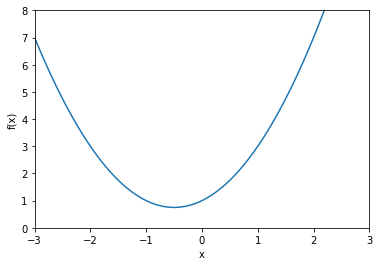

In [4]:
#plotting
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('x',fontsize=10)
plt.ylabel('f(x)',fontsize=10)
plt.plot(x_1,f(x_1))
plt.show()

## Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [5]:
def df(x):
  return (2*x)+1

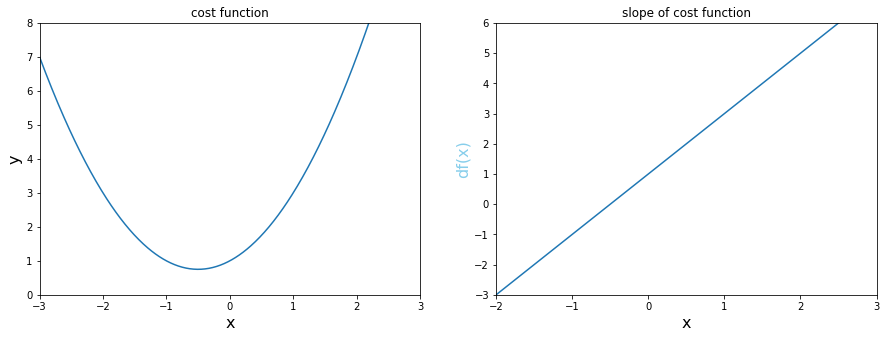

In [6]:
#plotting function and derivative side by side
plt.figure(figsize=([15,5]))

plt.subplot(1,2,1)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.title('cost function')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.plot(x_1,f(x_1))

plt.subplot(1,2,2)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.title('slope of cost function')
plt.xlabel('x',fontsize=16)
plt.ylabel('df(x)',fontsize=16,color='skyblue')
plt.plot(x_1,df(x_1))

plt.show()

## Gradient Descent

In [7]:
#task-1
new_x=3
previous_x=0
step_multiplier=0.1
precision=0.00001

x_list=[new_x]
slope_list=[df(new_x)]

for n in range(500):
  previous_x= new_x
  gradient= df(new_x)
  new_x=new_x-gradient*step_multiplier

  step_size=abs(previous_x-new_x)
  x_list.append(new_x)
  slope_list.append(df(new_x))

  if step_size<precision:
    print('loop ran this many times: ',n)
    break

print('local minimum occurs at:',new_x) 
print('slope at this point is:',df(new_x))   
print('f(x) at this value is:',f(new_x))

loop ran this many times:  50
local minimum occurs at: -0.49996003706460423
slope at this point is: 7.992587079153068e-05
f(x) at this value is: 0.7500000015970362


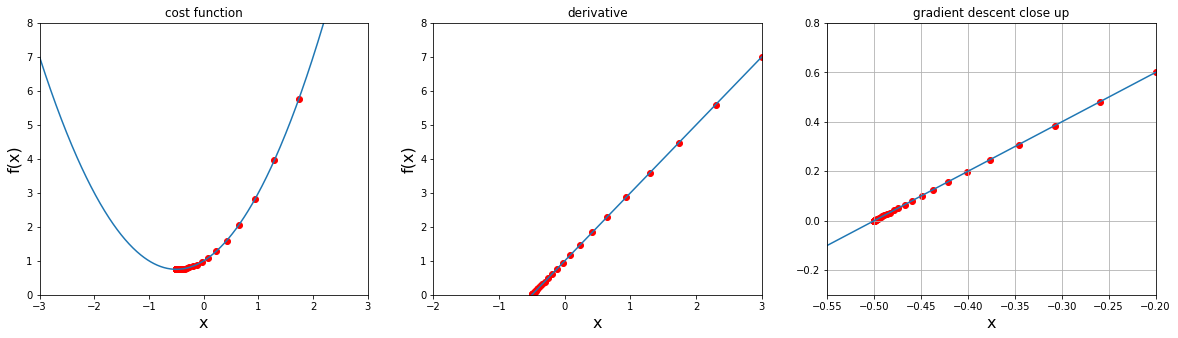

In [8]:
#superimposing gradient descent calculations on the plot
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.title('cost function')
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1))
values=np.array(x_list)
plt.scatter(x_list,f(values),color='red')

plt.subplot(1,3,2)
plt.xlim(-2,3)
plt.ylim(0,8)
plt.title('derivative')
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,df(x_1))
plt.scatter(x_list,slope_list,color='red')

plt.subplot(1,3,3)
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.title('gradient descent close up')
plt.xlabel('x',fontsize=16)
plt.grid()
plt.plot(x_1,df(x_1))
plt.scatter(x_list,slope_list,color='red')

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [9]:
#task 2
x_2 = np.linspace(-2, 2, 1000)
def g(x):
  return (x**4)-(4*(x**2))+5
def dg(x):
  return 4*(x**3)-8*x

new_x=-2
previous_x=0
step_multiplier=0.1
precision=0.00001

x_list=[new_x]
slope_list=[dg(new_x)]

for n in range(500):
  previous_x= new_x
  gradient= dg(new_x)
  new_x=new_x-gradient*step_multiplier

  step_size=abs(previous_x-new_x)
  x_list.append(new_x)
  slope_list.append(dg(new_x))

  if step_size<precision:
    print('loop ran this many times: ',n)
    break

print('local minimum occurs at:',new_x) 
print('slope at this point is:',dg(new_x))   
print('f(x) at this value is:',g(new_x))  

loop ran this many times:  22
local minimum occurs at: -1.414211082183292
slope at this point is: 3.968293245648624e-05
f(x) at this value is: 1.0000000000492109


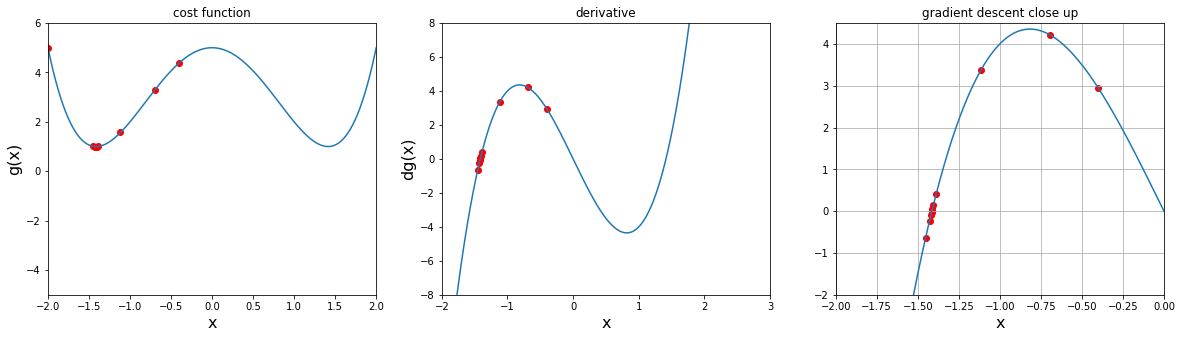

In [10]:
#TASK 3
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
plt.xlim(-2,2)
plt.ylim(-5,6)
plt.title('cost function')
plt.xlabel('x',fontsize=16)
plt.ylabel('g(x)',fontsize=16)
plt.plot(x_2,g(x_2))
values=np.array(x_list)
plt.scatter(x_list,g(values),color='red')

plt.subplot(1,3,2)
plt.xlim(-2,3)
plt.ylim(-8,8)
plt.title('derivative')
plt.xlabel('x',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.plot(x_2,dg(x_2))
plt.scatter(x_list,slope_list,color='red')

plt.subplot(1,3,3)
plt.xlim(-2,0)
plt.ylim(-2,4.5)
plt.title('gradient descent close up')
plt.xlabel('x',fontsize=16)
plt.grid()
plt.plot(x_2,dg(x_2))
plt.scatter(x_list,slope_list,color='red')

plt.show()

In [11]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, 
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [12]:
local_min, list_x, deriv_list = gradient_descent(df, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -0.47661413492746374
Number of steps: 93


In [13]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


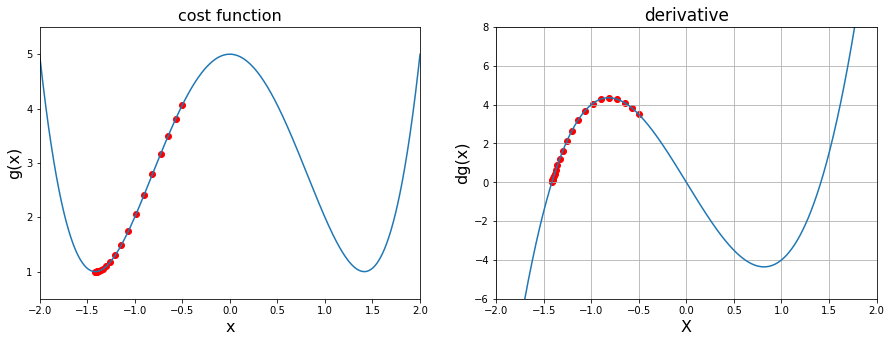

In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5)

plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('cost function', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2))
plt.scatter(list_x, g(np.array(list_x)), color='red')

plt.subplot(1, 2, 2)
plt.title('derivative', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.plot(x_2, dg(x_2))
plt.scatter(list_x, deriv_list, color='red')

plt.show()

# Example 3 - Divergence and Overflow

## $$h(x) = x^5 - 2x^4 + 2$$

In [16]:
x_3 = np.linspace(0, 2, 100)
def h(x):
  return (x**5)-(2*(x**4))+2
def dh(x):
  return 5*x*x*x*x-8*x*x*x

new_x=1
previous_x=0
step_multiplier=0.1
precision=0.00001

x_list=[new_x]
slope_list=[dh(new_x)]

for n in range(500):
  previous_x= new_x
  gradient= dh(new_x)
  new_x=new_x-gradient*step_multiplier

  step_size=abs(previous_x-new_x)
  x_list.append(new_x)
  slope_list.append(dh(new_x))

  if step_size<precision:
    print('loop ran this many times: ',n)
    break

print('local minimum occurs at:',new_x) 
print('slope at this point is:',dh(new_x))   
print('f(x) at this value is:',h(new_x))  

local minimum occurs at: 1.6559019781690232
slope at this point is: 1.2691152288404268
f(x) at this value is: -0.5871444386160096


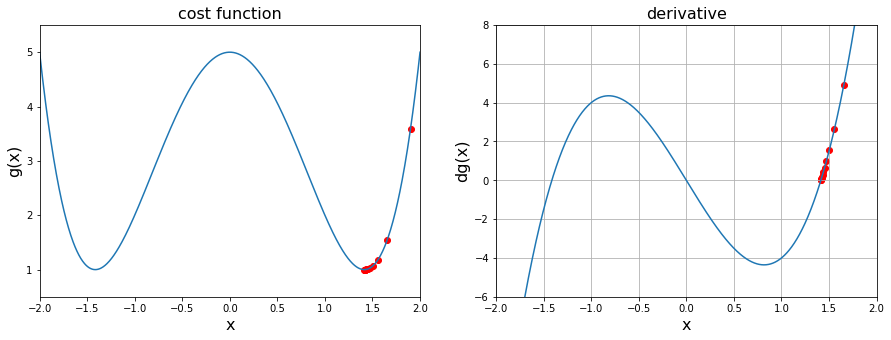

number of steps is:  14


In [17]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,multiplier=0.02, max_iter=500)

plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('cost function', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2))
plt.scatter(list_x, g(np.array(list_x)), color='red')

plt.subplot(1, 2, 2)

plt.title('derivative', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.plot(x_2, dg(x_2))
plt.scatter(list_x, deriv_list, color='red')
plt.show()
print('number of steps is: ', len(list_x))

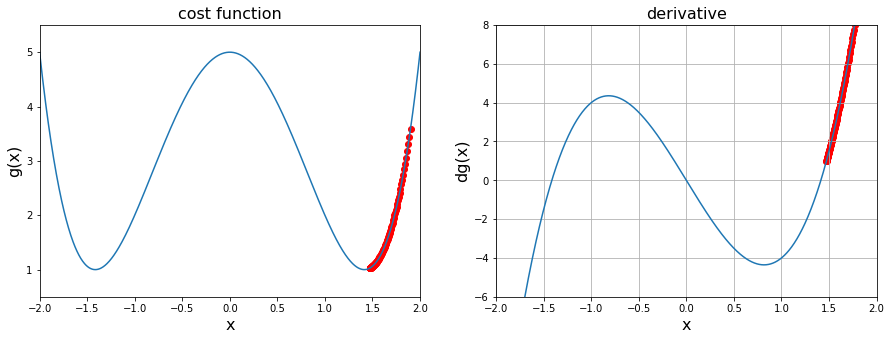

number of steps is:  110


In [18]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,multiplier=0.001, max_iter=500)

plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('cost function', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2))
plt.scatter(list_x, g(np.array(list_x)), color='red')

plt.subplot(1, 2, 2)

plt.title('derivative', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.plot(x_2, dg(x_2))
plt.scatter(list_x, deriv_list, color='red')
plt.show()
print('number of steps is: ', len(list_x))

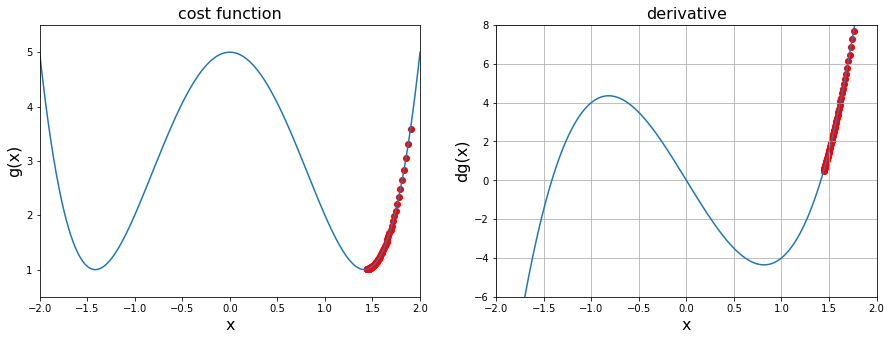

number of steps is:  75


In [19]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,multiplier=0.002, max_iter=500)

plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('cost function', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2))
plt.scatter(list_x, g(np.array(list_x)), color='red')

plt.subplot(1, 2, 2)

plt.title('derivative', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.plot(x_2, dg(x_2))
plt.scatter(list_x, deriv_list, color='red')
plt.show()
print('number of steps is: ', len(list_x))

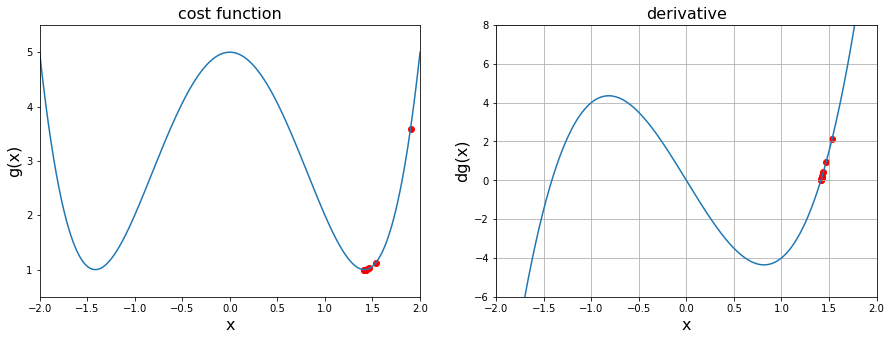

number of steps is:  9


In [20]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,multiplier=0.03, max_iter=500)

plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('cost function', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2))
plt.scatter(list_x, g(np.array(list_x)), color='red')

plt.subplot(1, 2, 2)

plt.title('derivative', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.plot(x_2, dg(x_2))
plt.scatter(list_x, deriv_list, color='red')
plt.show()
print('number of steps is: ', len(list_x))

In [21]:
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,multiplier=0.0005, precision=0.0001, max_iter=n)


mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,multiplier=0.002, precision=0.0001, max_iter=n)
insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9,multiplier=0.25, precision=0.0001, max_iter=n)

# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [22]:
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


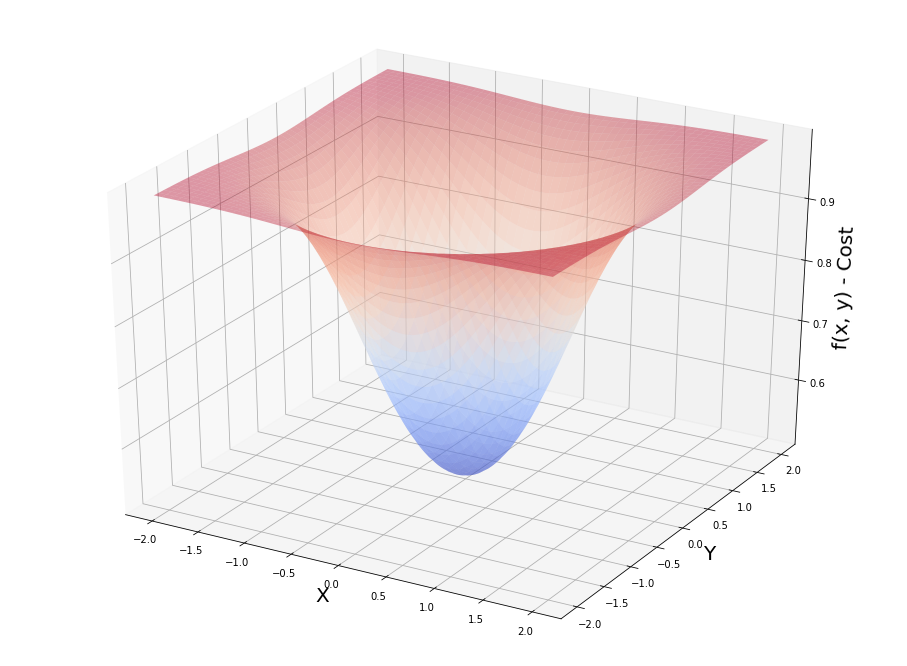

In [23]:
def f(x,y):
  p=-(x*x)-(y*y)
  p=3**p
  p=p+1
  return 1/p

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

In [24]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ', 
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505
